Text(0.5, 1.0, "Calculated rewards for various numbers of credit cards for Nate's expenses")

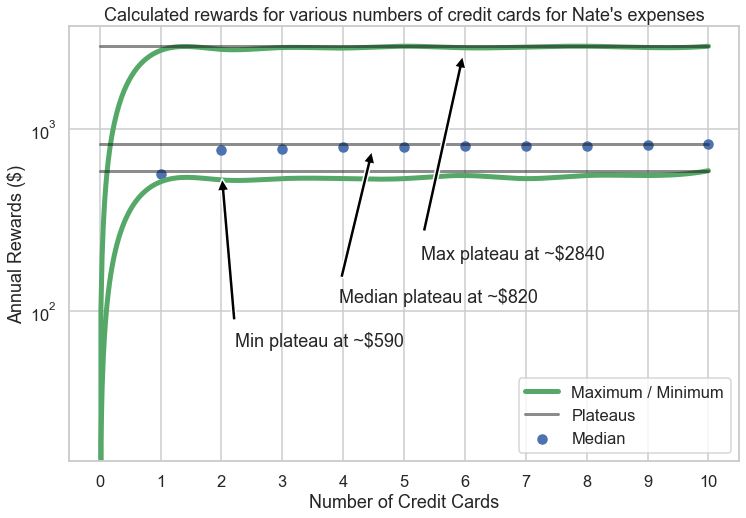

In [1]:
import os, pickle
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')


f = open('calculated_rewards.pkl', 'rb')
calculated_rewards = pickle.load(f)


mins = []
medians = []
maxes = []
for card_number, rewards in calculated_rewards.items():
    # For `card_number` number of credit cards ...
    mins.append(np.min(rewards)) # ... the min rewards 
    maxes.append(np.max(rewards)) # ... the max rewards
    medians.append(np.median(rewards)) # ... the median rewards

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(calculated_rewards.keys(), medians, label='Median')

smooth_median = max(medians)
smooth_number_of_cards = np.linspace(min(calculated_rewards.keys()), max(calculated_rewards.keys()), 500)  

# Smoothing the curve for min rewards 
power_smooth = interp1d(list(calculated_rewards.keys()), mins, kind='cubic')
smooth_min = max(power_smooth(smooth_number_of_cards)) # the limit
ax.plot(smooth_number_of_cards, power_smooth(smooth_number_of_cards), '-', c='g', linewidth=5, label='Maximum / Minimum')

# Smoothing the curve for max rewards
power_smooth = interp1d(list(calculated_rewards.keys()), maxes, kind='cubic')
smooth_max = max(power_smooth(smooth_number_of_cards)) # the limit
ax.plot(smooth_number_of_cards, power_smooth(smooth_number_of_cards), '-', c='g', linewidth=5)


# Plotting lines for the limits of the max, median, and min
ax.plot([0,10], [smooth_min, smooth_min], alpha=0.5, c='k', linewidth=3, label='Plateaus')
ax.plot([0,10], [smooth_max, smooth_max], alpha=0.5, c='k', linewidth=3)
ax.plot([0,10], [smooth_median, smooth_median], alpha=0.5, c='k', linewidth=3)
ax.annotate(f'Max plateau at ~${int(round(smooth_max,-1))}', xy=(6, smooth_max),  xycoords='data',
            xytext=(0.8, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate(f'Min plateau at ~${int(round(smooth_min,-1))}', xy=(2, smooth_min),  xycoords='data',
            xytext=(0.5, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate(f'Median plateau at ~${int(round(smooth_median,-1))}', xy=(4.5, smooth_median),  xycoords='data',
            xytext=(0.7, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.set_yscale('log', nonposy='clip')
ax.legend()
ax.set_xticks(range(11))
ax.set_ylabel('Annual Rewards (\$)')
ax.set_xlabel('Number of Credit Cards')
ax.set_title('Calculated rewards for various numbers of credit cards for Nate\'s expenses')


In [2]:
fig.savefig('trends.pdf', bbox_inches='tight')